[20, 34, 62, 118, 230, 454, 902, 1798, 3590, 7174, 14342, 28678, 57350, 114694, 229382, 458758, 917510]
[0.007170700002461672, 0.006819600006565452, 0.005570999986957759, 0.0072465999983251095, 0.008328600000822917, 0.01055200002156198, 0.01567270001396537, 0.02454849999048747, 0.05175959999905899, 0.1038966000196524, 0.18761709998943843, 0.3444782999868039, 0.5739059999759775, 1.3567331000231206, 2.8076349000039045, 5.543700799986254, 12.056602199998451]
[0.0004250000056345016, 0.0010100000072270632, 0.0011587999761104584, 0.0022431000252254307, 0.0042181000171694905, 0.007845999993151054, 0.016344200004823506, 0.03145030001178384, 0.06361840001773089, 0.12680170001112856, 0.3327264999970794, 0.6000470999861136, 1.1306818000157364, 2.3570267999893986, 5.698524599982193, 10.733551099983742, 21.869801499997266]


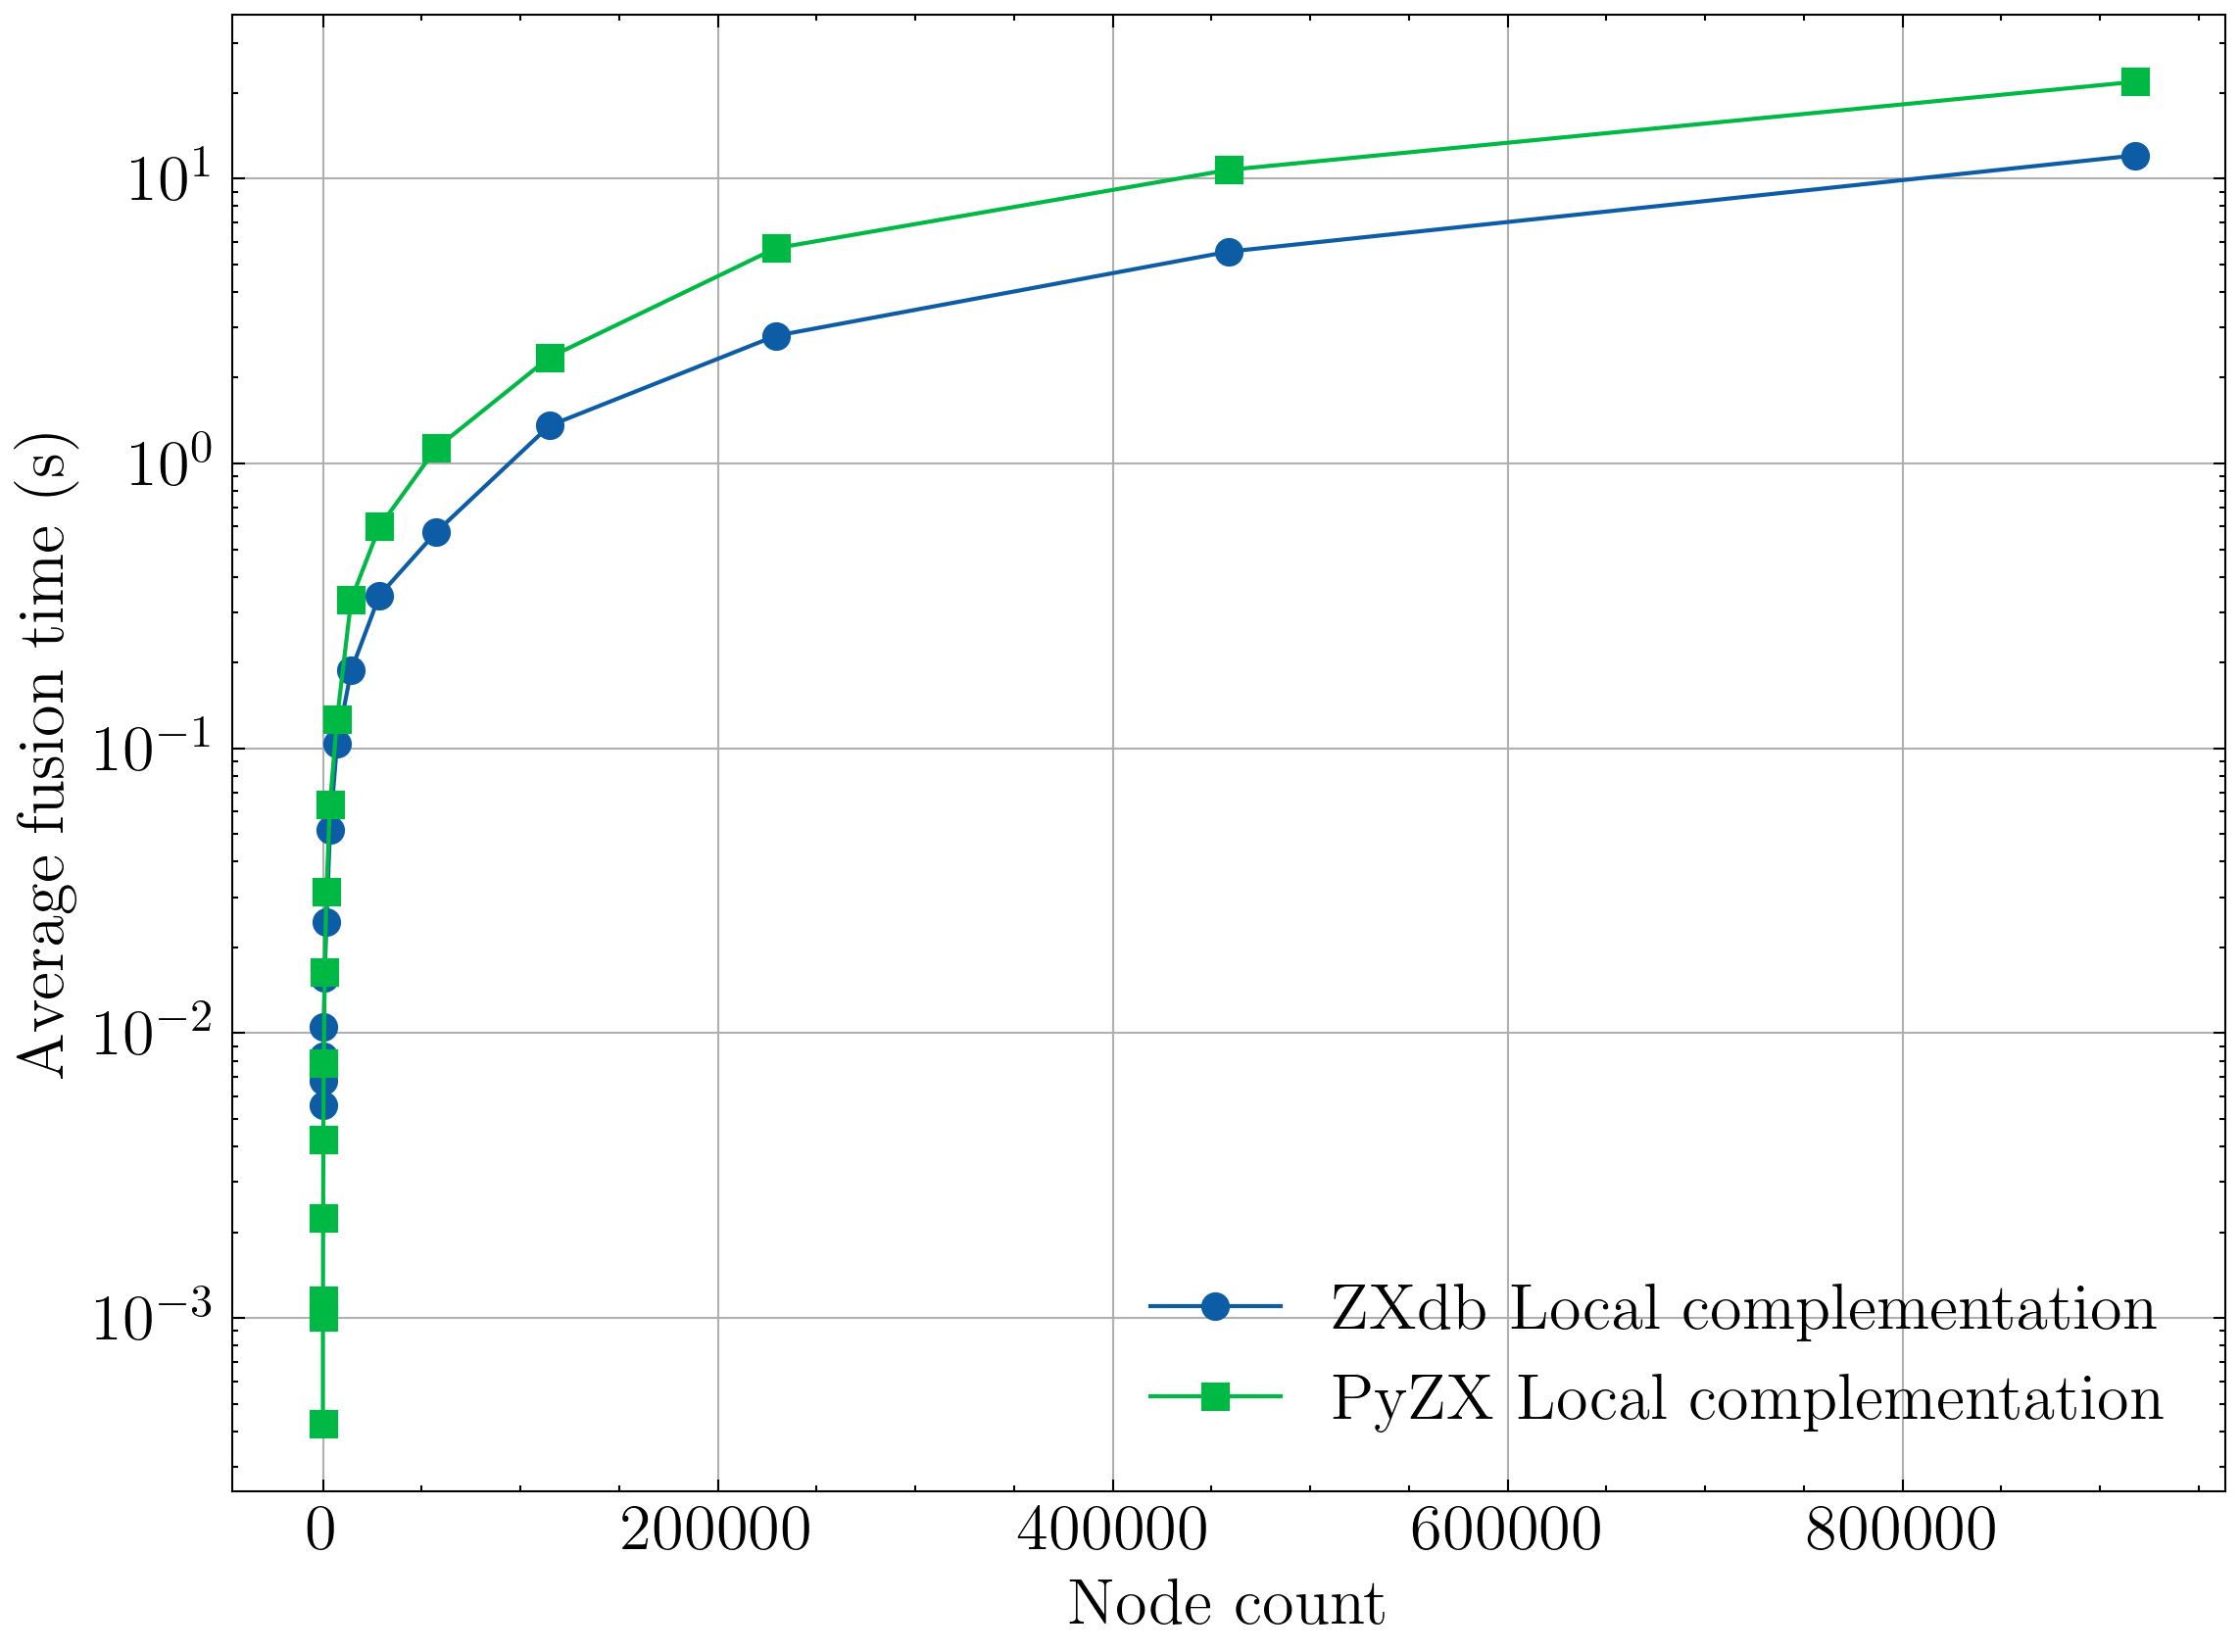

In [1]:
import os
import json
import matplotlib.pyplot as plt
import scienceplots
from collections import defaultdict
import re

plt.style.use('science')
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

# Path to your experiment folder
rules = ["identity_cancellation", "local_complementation"]
name_in_legends = ["Identity removal", "Local complementation"]
index = 1  # Change this index to switch between rules
rule = rules[index]
name_in_legend = name_in_legends[index]
folder = rule

# Collect results
results = defaultdict(lambda: {'db': [], 'pyzx': []})

for fname in os.listdir(folder):
    if fname.endswith('.json'):
        with open(os.path.join(folder, fname), 'r') as f:
            data = json.load(f)
            init_stats = data.get('initial_stats', '')
            match = re.search(r'Graph\((\d+)\s+vertices', init_stats)
            nodes = int(match.group(1)) if match else None
            db_time = data.get(f'db_{rule}_time')
            pyzx_time = data.get(f'pyzx_{rule}_time')
            if nodes is not None and db_time is not None and pyzx_time is not None:
                results[nodes]['db'].append(db_time)
                results[nodes]['pyzx'].append(pyzx_time)

# Prepare data for plotting
node_counts = sorted(results.keys())
db_times = [sum(results[n]['db'])/len(results[n]['db']) for n in node_counts]
pyzx_times = [sum(results[n]['pyzx'])/len(results[n]['pyzx']) for n in node_counts]

print(node_counts)
print(db_times)
print(pyzx_times)

# Plot
plt.figure(figsize=(8,6))
plt.plot(node_counts, db_times, 'o-', label=f'ZXdb {name_in_legend}')
plt.plot(node_counts, pyzx_times, 's-', label=f'PyZX {name_in_legend}')
plt.xlabel('Node count')
plt.ylabel('Average fusion time (s)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
def tikz_plot_two_series(x, y1, y2, xlabel="Input Size", ylabel="Value", 
                         legend1="Series 1", legend2="Series 2", title=None,
                         ymode=None):
    """
    Generate an academically professional TikZ/PGFPlots snippet for two datasets.

    Parameters
    ----------
    x : list of float
        X-axis data.
    y1 : list of float
        First dataset values.
    y2 : list of float
        Second dataset values.
    xlabel : str
        Label for x-axis.
    ylabel : str
        Label for y-axis.
    legend1 : str
        Legend entry for first dataset.
    legend2 : str
        Legend entry for second dataset.
    title : str, optional
        Title for the plot.
    ymode : str, optional
        'log' for logarithmic y-axis, otherwise linear.
    """
    header = [
        "\\begin{tikzpicture}",
        "  \\begin{axis}[",
        "    width=10cm,",
        "    height=6cm,",
        f"    xlabel={{{xlabel}}},",
        f"    ylabel={{{ylabel}}},",
        "    grid=both,",
        "    grid style={line width=.1pt, draw=gray!30},",
        "    major grid style={line width=.2pt,draw=gray!60},",
        "    minor tick num=1,",
        "    legend style={at={(0.02,0.98)},anchor=north west, font=\\small},",
        "    every axis plot/.append style={thick},",
    ]
    
    if ymode == "log":
        header.append("    ymode=log,")
    if title:
        header.append(f"    title={{{title}}},")

    header.append("  ]")

    coords1 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y1))
    coords2 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y2))

    plot1 = (
        "    \\addplot+[mark=*, color=blue] "
        f"coordinates {{{coords1}}};\n"
        f"    \\addlegendentry{{{legend1}}}"
    )
    plot2 = (
        "    \\addplot+[mark=square*, color=red] "
        f"coordinates {{{coords2}}};\n"
        f"    \\addlegendentry{{{legend2}}}"
    )

    footer = [
        "  \\end{axis}",
        "\\end{tikzpicture}",
    ]

    return "\n".join(header + [plot1, plot2] + footer)


In [3]:
tikz_code = tikz_plot_two_series(
    node_counts, db_times, pyzx_times,
    xlabel="Node count",
    ylabel="Average time (s)",
    legend1="ZXdb",
    legend2="PyZX",
    title="Scaling Comparison",
    ymode="log"  # since values span several orders of magnitude
)

print(tikz_code)

\begin{tikzpicture}
  \begin{axis}[
    width=10cm,
    height=6cm,
    xlabel={Node count},
    ylabel={Average time (s)},
    grid=both,
    grid style={line width=.1pt, draw=gray!30},
    major grid style={line width=.2pt,draw=gray!60},
    minor tick num=1,
    legend style={at={(0.02,0.98)},anchor=north west, font=\small},
    every axis plot/.append style={thick},
    ymode=log,
    title={Scaling Comparison},
  ]
    \addplot+[mark=*, color=blue] coordinates {(20, 0.007170700002461672)
(34, 0.006819600006565452)
(62, 0.005570999986957759)
(118, 0.0072465999983251095)
(230, 0.008328600000822917)
(454, 0.01055200002156198)
(902, 0.01567270001396537)
(1798, 0.02454849999048747)
(3590, 0.05175959999905899)
(7174, 0.1038966000196524)
(14342, 0.18761709998943843)
(28678, 0.3444782999868039)
(57350, 0.5739059999759775)
(114694, 1.3567331000231206)
(229382, 2.8076349000039045)
(458758, 5.543700799986254)
(917510, 12.056602199998451)};
    \addlegendentry{ZXdb}
    \addplot+[mark=square*